## Análisis de datos - Clase 3

### Taller práctico - análisis completo de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1. Importamos los datasets

In [2]:
# Dataset de carreras del 2024
raw_carreras_24 = pd.read_csv('../datasets/f1_2024_R.csv')

### EDA (Exploratory Data Analysis)


#### Dimensiones

In [3]:
raw_carreras_24.shape

(26606, 40)

#### Columnas y tipos de datos

In [4]:
raw_carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              26606 non-null  object 
 1   DriverNumber        26606 non-null  int64  
 2   LapTime             26381 non-null  float64
 3   LapNumber           26606 non-null  float64
 4   Stint               26606 non-null  float64
 5   PitOutTime          840 non-null    object 
 6   PitInTime           849 non-null    object 
 7   Sector1Time         26066 non-null  float64
 8   Sector2Time         26574 non-null  float64
 9   Sector3Time         26553 non-null  float64
 10  Sector1SessionTime  26008 non-null  object 
 11  Sector2SessionTime  26574 non-null  object 
 12  Sector3SessionTime  26553 non-null  object 
 13  SpeedI1             22460 non-null  float64
 14  SpeedI2             26552 non-null  float64
 15  SpeedFL             25728 non-null  float64
 16  Spee

In [5]:
raw_carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'SessionType',
       'EventDate', 'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity',
       'AvgSpeed', 'MaxThrottle', 'AvgBrake'],
      dtype='object')

In [6]:
# Armamos un nuevo dataset con menos columnas para el análisis

carreras_24 = raw_carreras_24.drop(columns=['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
        'SessionType', 'AvgSpeed', 'MaxThrottle', 'AvgBrake'], axis=1)


In [7]:
carreras_24.shape

(26606, 33)

In [8]:
carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
       'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'EventDate',
       'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity'],
      dtype='object')


### Detalles de las columnas del dataset

#### Corredor y equipo
* Driver: nombre del piloto
* DriverNumber: número del piloto
* Team: nombre del equipo constructor
* Grid: posición de salida (1,2,3, etc.)

#### Vueltas y tiempos
* PitInLap: tiempo desde el comienzo de la vuelta en el que el piloto entra en boxes (timedelta).
* PinOutLap: tiempo desde el comienzo de la vuelta en el que el piloto sale de boxes (timedelta).
* IsPersonalBest: indica si la vuelta fue la mejor del piloto en la sesión (1,0)
* Stint: indica el cambio de cubiertas (1,2,3, etc.)
* LapTime: tiempo de la vuelta (en segundos)
* LapNumber: número de vuelta (1,2,3, etc.)

#### Telemetría

* SpeedI1, SpeedI2: velocidad en dos puntos intermedio de la vuelta (km/h)
* SpeedFL: velocidad en la línea de meta (km/h)
* SpeedST: velocidad en el speed trap que es el punto más rápido en la recta (km/h)

#### Condiciones climáticas
* AirTemp: temperatura del aire (°C)
* TrackTemp: temperatura de la pista (°C)
* Humidity: humedad (%)

#### Cubiertas
* Compound: tipo de cubierta (Duro, Medio, Blando, de lluvia, etc.)
* TyreLife: vida útil de la cubierta (número de vueltas)
* FreshTyre: indica si la cubierta es nueva o usada (1,0)

#### Contexto

* TrackStatus: las condiciones de la pista (1 para verde, 2 para amarilla, 4 para Safety Car)
* Position: la posición del piloto al final de la vuelta (1,2,3, etc.)
* Deleted: indica si la vuelta fue eliminada (por alguna infracción, por ejemplo, por exceder los límites de la pista)
* DeletedReason: la razon por la que la vuelta fue eliminada (por ejemplo, por exceder los límites de la pista)
* FastF1Generated: indica si los datos fueron generados por FastF1 (por ejemplo, si la telemetría está incompleta)
* IsAccurate: indica si los datos son confiables (por ejemplo, si no hay interpolación)


#### Vista general del dataset

In [9]:
carreras_24.head(10)

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
0,VER,1,97.284,1.0,1.0,NaN,NaN,NaN,41.266,23.616,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
1,LEC,16,98.271,1.0,1.0,NaN,NaN,NaN,41.549,23.635,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
2,RUS,63,99.228,1.0,1.0,NaN,NaN,NaN,42.099,23.694,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
3,NOR,4,102.168,1.0,1.0,NaN,NaN,NaN,43.309,24.244,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
4,HAM,44,103.122,1.0,1.0,NaN,NaN,NaN,43.609,24.393,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
5,PIA,81,102.523,1.0,1.0,NaN,NaN,NaN,43.573,24.140,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
6,ALO,14,101.679,1.0,1.0,NaN,NaN,NaN,43.268,24.162,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
7,SAR,2,105.921,1.0,1.0,NaN,NaN,NaN,43.162,24.178,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
8,SAI,55,100.620,1.0,1.0,NaN,NaN,NaN,42.861,23.765,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
9,ZHO,24,104.801,1.0,1.0,NaN,NaN,NaN,43.576,24.294,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0


In [10]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Driver           26606 non-null  object 
 1   DriverNumber     26606 non-null  int64  
 2   LapTime          26381 non-null  float64
 3   LapNumber        26606 non-null  float64
 4   Stint            26606 non-null  float64
 5   PitOutTime       840 non-null    object 
 6   PitInTime        849 non-null    object 
 7   Sector1Time      26066 non-null  float64
 8   Sector2Time      26574 non-null  float64
 9   Sector3Time      26553 non-null  float64
 10  SpeedI1          22460 non-null  float64
 11  SpeedI2          26552 non-null  float64
 12  SpeedFL          25728 non-null  float64
 13  SpeedST          24422 non-null  float64
 14  IsPersonalBest   26591 non-null  object 
 15  Compound         26606 non-null  object 
 16  TyreLife         26606 non-null  float64
 17  FreshTyre   

In [11]:
carreras_24['TyreLife'].unique()

array([ 4.,  1.,  5.,  2.,  6.,  3.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.])

In [12]:
carreras_24['TrackStatus'].unique()

array([  12,    1,   21,  124,   24,    4,   41,  126, 1267, 2671,  671,
         71,   26,    6,  125,   64,   16,  167, 1254,   14,  412,  267,
         45,   51, 1264])

#### Ajustamos los tipos de datos

In [13]:
# Categóricas
carreras_24['EventName'] = carreras_24['EventName'].astype('category')
carreras_24['Driver'] = carreras_24['Driver'].astype('category')
carreras_24['DriverNumber'] = carreras_24['DriverNumber'].astype('category')
carreras_24['Team'] = carreras_24['Team'].astype('category')
carreras_24['FreshTyre'] = carreras_24['FreshTyre'].astype('category')
carreras_24['TyreLife'] = carreras_24['TyreLife'].astype('category')
carreras_24['Compound'] = carreras_24['Compound'].astype('category')
carreras_24['Stint'] = carreras_24['Stint'].astype('category')
carreras_24['IsPersonalBest'] = carreras_24['IsPersonalBest'].astype('category')
carreras_24['Deleted'] = carreras_24['Deleted'].astype('category')
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].astype('category')
carreras_24['TrackStatus'] = carreras_24['TrackStatus'].astype('category')

# Numéricas temporales
carreras_24['EventDate'] = pd.to_datetime(carreras_24['EventDate'])
carreras_24['PitInTime'] = pd.to_timedelta(carreras_24['PitInTime'])
carreras_24['PitOutTime'] = pd.to_timedelta(carreras_24['PitOutTime'])

# Numéricas discretas
carreras_24['LapNumber'] = carreras_24['LapNumber'].astype('int')


#### Variables numéricas: estadística descriptiva

In [14]:
carreras_24.describe()

,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,LapStartTime,Position,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
count,26381.000000,26606.000000,840,849,26066.000000,26574.000000,26553.000000,22460.000000,26552.000000,25728.000000,24422.000000,26606.000000,26578.000000,26606,26606.000000,26606.000000,26606.000000,26606.000000
mean,92.727333,30.507931,0 days 01:37:42.147103571,0 days 01:36:26.654181389,28.544514,35.105664,27.942290,254.994167,247.649292,268.093711,296.643928,6191.722126,9.793325,2024-07-20 19:42:45.165752064,6191.860156,23.490434,35.588191,54.358303
min,67.694000,1.000000,0 days 00:04:17.809000,0 days 00:15:20.353000,16.897000,17.488000,17.690000,59.000000,57.000000,1.000000,64.000000,245.608000,1.000000,2024-03-02 00:00:00,246.621000,14.500000,16.700000,30.000000
25%,81.964000,15.000000,0 days 01:18:31.260750,0 days 01:16:58.954000,25.398250,29.584000,23.076000,214.000000,211.000000,248.000000,289.000000,4707.357750,5.000000,2024-05-19 00:00:00,4703.094000,19.200000,28.700000,45.000000
50%,89.076000,30.000000,0 days 01:38:21.220500,0 days 01:38:45.781000,28.470000,32.958000,25.949000,273.000000,257.000000,275.000000,302.000000,6136.312500,10.000000,2024-07-07 00:00:00,6134.155000,22.000000,37.000000,53.000000
75%,98.704000,45.000000,0 days 01:53:11.494750,0 days 01:53:19.090000,31.086000,41.288000,31.986000,289.000000,280.000000,291.000000,313.000000,7584.237750,14.000000,2024-09-22 00:00:00,7581.674000,28.300000,43.500000,63.000000
max,2526.253000,78.000000,0 days 03:11:24.136000,0 days 03:10:59.688000,97.585000,90.308000,97.241000,357.000000,343.000000,357.000000,362.000000,11925.420000,20.000000,2024-12-08 00:00:00,11903.549000,33.900000,51.700000,92.000000
std,60.498621,18.260169,0 days 00:24:21.070185,0 days 00:24:02.916710214,6.928019,7.506386,7.434872,45.269851,43.887292,34.744874,31.732479,1929.832188,5.430816,NaN,1929.959971,4.789366,9.032689,13.877374


#### Variables categóricas: exploración

In [15]:
carreras_24.describe(include='category')

,Driver,DriverNumber,Stint,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,TrackStatus,Deleted,DeletedReason,EventName
count,26606,26606,26606.0,26591,26606,26606.0,26606,26606,26606,26606,326,26606
unique,24,25,5.0,2,6,78.0,2,10,25,2,255,24
top,PIA,81,2.0,False,HARD,4.0,True,McLaren,1,False,TRACK LIMITS AT TURN 1 LAP 10,Dutch Grand Prix
freq,1444,1444,11438.0,21094,13767,1162.0,21042,2881,24604,26280,5,1426


#### Variable TrackStatus 

Valores conocidos (https://docs.fastf1.dev/api.html#fastf1.api.track_status_data)

* 1: Track clear (beginning of session or to indicate the end of another status)
* 2: Yellow flag (sectors are unknown)
* 3: ??? Never seen so far, does not exist?
* 4: Safety Car
* 5: Red Flag
* 6: Virtual Safety Car deployed
* 7: Virtual Safety Car ending (As indicated on the drivers steering wheel, on tv and so on; status ‘1’ will mark the actual end)

<Axes: xlabel='TrackStatus', ylabel='percent'>

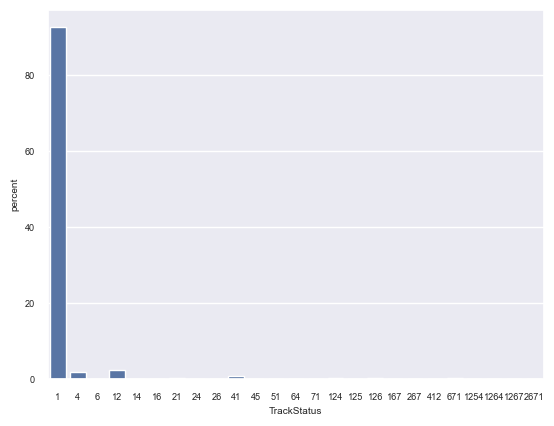

In [16]:
sns.set_theme(font_scale=0.6)
sns.countplot(data=carreras_24, x= 'TrackStatus', stat='percent' )

In [17]:
# Pilotos que corrieron en el 2024
carreras_24['Driver'].unique()

['VER', 'LEC', 'RUS', 'NOR', 'HAM', ..., 'STR', 'BEA', 'COL', 'LAW', 'DOO']
Length: 24
Categories (24, object): ['ALB', 'ALO', 'BEA', 'BOT', ..., 'STR', 'TSU', 'VER', 'ZHO']

In [18]:
# Constructores que participaron en el 2024
carreras_24['Team'].unique()

['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'Aston Martin', 'Williams', 'Kick Sauber', 'RB', 'Haas F1 Team', 'Alpine']
Categories (10, object): ['Alpine', 'Aston Martin', 'Ferrari', 'Haas F1 Team', ..., 'Mercedes', 'RB', 'Red Bull Racing', 'Williams']

In [19]:
# ¿En cuántos equipos estuvo cada piloto?
teams = carreras_24.groupby('Driver', observed=True)['Team'].nunique().reset_index()

teams

,Driver,Team
0,ALB,1
1,ALO,1
2,BEA,2
3,BOT,1
4,COL,1
5,DOO,1
6,GAS,1
7,HAM,1
8,HUL,1
9,LAW,1


In [20]:
# Tipo de cubiertas
carreras_24['Compound'].unique()

['SOFT', 'HARD', 'MEDIUM', 'INTERMEDIATE', 'WET', 'UNKNOWN']
Categories (6, object): ['HARD', 'INTERMEDIATE', 'MEDIUM', 'SOFT', 'UNKNOWN', 'WET']

In [21]:
# Pilotos por equipo
equipos = carreras_24[['Driver', 'Team']].drop_duplicates().sort_values(by='Team').reset_index(drop=True)

equipos.head(25)

,Driver,Team
0,DOO,Alpine
1,GAS,Alpine
2,OCO,Alpine
3,ALO,Aston Martin
4,STR,Aston Martin
5,SAI,Ferrari
6,BEA,Ferrari
7,LEC,Ferrari
8,BEA,Haas F1 Team
9,HUL,Haas F1 Team


In [22]:
# Grand Prix que se corrieron en el 2024
carreras_24['EventName'].unique()

['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Japanese Grand Prix', 'Chinese Grand Prix', ..., 'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Qatar Grand Prix', 'Abu Dhabi Grand Prix']
Length: 24
Categories (24, object): ['Abu Dhabi Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix', 'Azerbaijan Grand Prix', ..., 'Singapore Grand Prix', 'Spanish Grand Prix', 'São Paulo Grand Prix', 'United States Grand Prix']

In [23]:
# Total de carreras en las que participó cada piloto

driver_events = carreras_24.groupby('Driver', observed=True)['EventName'].nunique().reset_index()
driver_events = driver_events.sort_values(ascending=False, by='EventName')

driver_events


,Driver,EventName
1,ALO,24
3,BOT,24
6,GAS,24
7,HAM,24
12,NOR,24
14,PER,24
10,LEC,24
8,HUL,24
23,ZHO,24
20,STR,24


### Visualización de datos

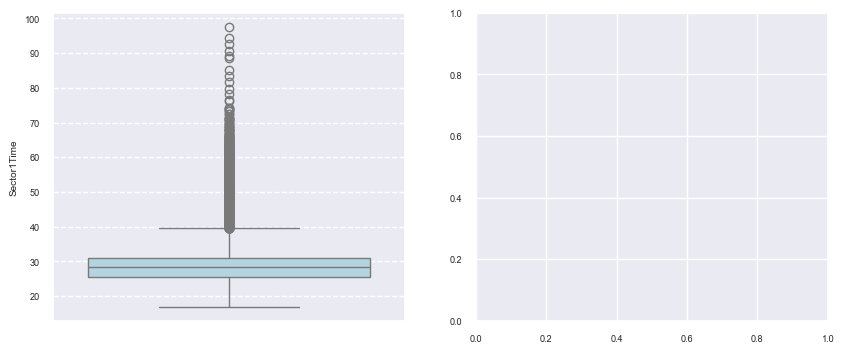

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=carreras_24, y='Sector1Time', color="lightblue", ax=ax[0])

ax[0].grid(axis='y', ls='--')

plt.show()

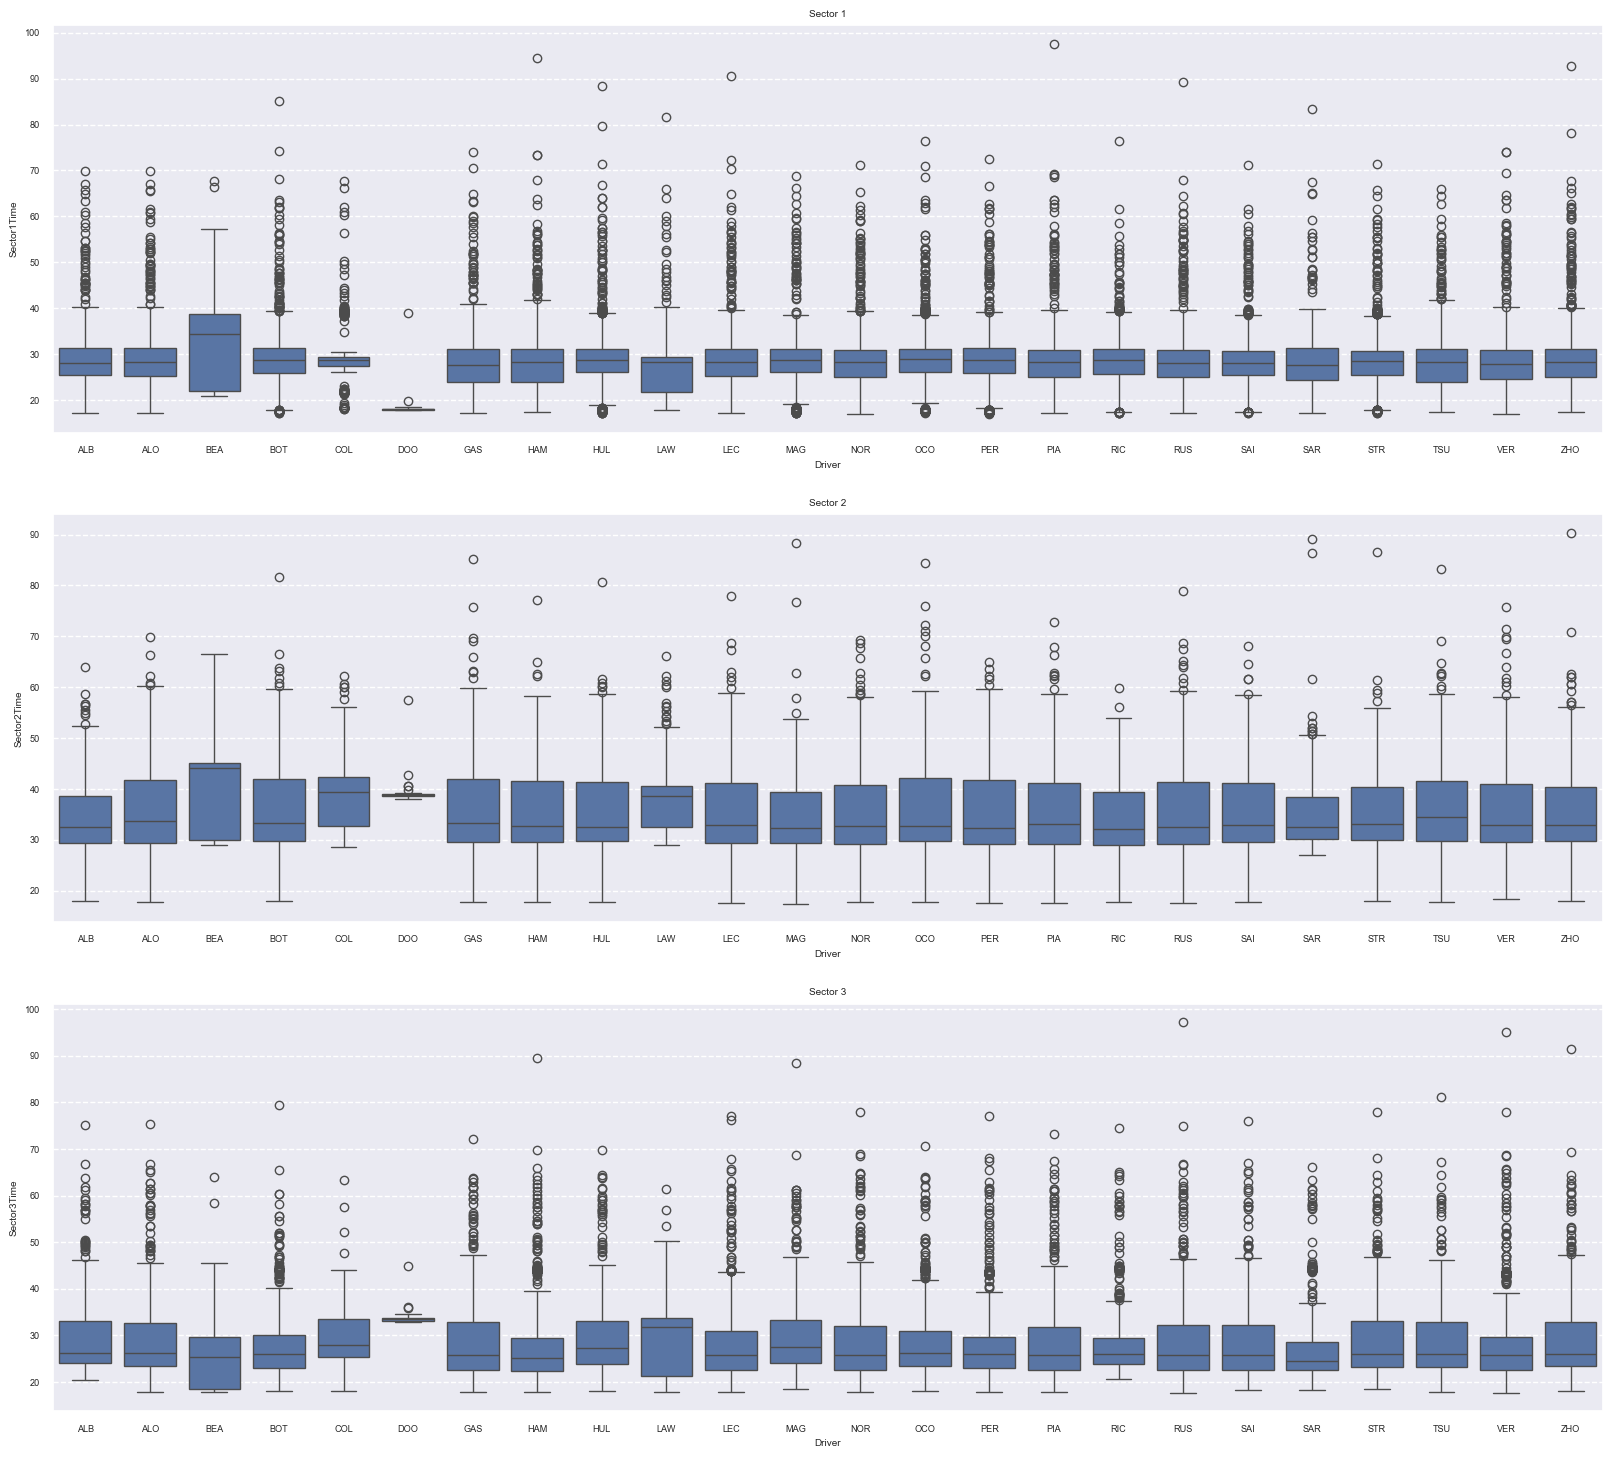

In [25]:
fig, ax = plt.subplots(3, 1,figsize=(20, 18))

sns.boxplot(data=carreras_24, y='Sector1Time', x='Driver', ax=ax[0])
sns.boxplot(data=carreras_24, y='Sector2Time', x='Driver', ax=ax[1])
sns.boxplot(data=carreras_24, y='Sector3Time', x='Driver', ax=ax[2])

for i in (0,1,2):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_title(f'Sector {i+1}')

plt.show()

In [26]:
def scatter(driver, race='all'):
    if race == 'all':
        df = carreras_24[carreras_24['Driver']==driver]
    else:
        df = carreras_24[(carreras_24['Driver']==driver) & (carreras_24['EventName']==race)]

    plt.figure(figsize=(10, 5))
    plt.scatter(df['LapStartDate'], df['Sector1Time'], label='Sector 1', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector2Time'], label='Sector 2', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector3Time'], label='Sector 3', alpha=0.7)

    plt.xlabel('')
    plt.ylabel('Time')
    plt.title(f'Tiempos por sector - Piloto: {driver} - Carrera(s):{race}')
    plt.legend()
    plt.xticks(ticks=plt.xticks()[0], labels=[''] * len(plt.xticks()[0]))
    plt.show()

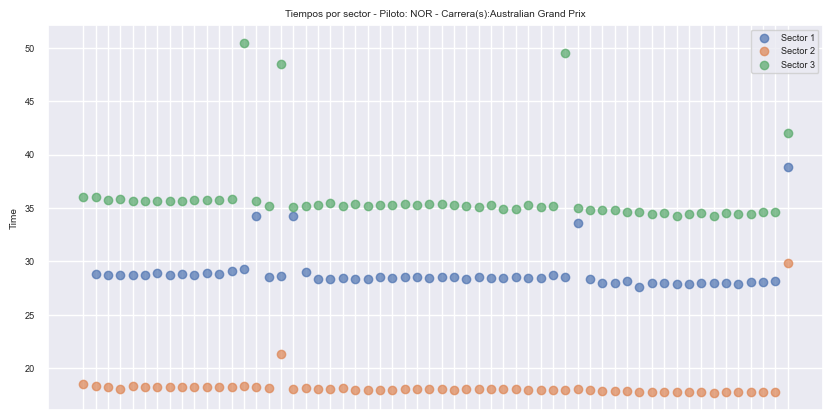

In [27]:
scatter('NOR', 'Australian Grand Prix')

### Datos faltantes

In [28]:
# Serie con los valores faltantes
faltantes = carreras_24.isnull().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(carreras_24)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
DeletedReason,26280,98.77
PitOutTime,25766,96.84
PitInTime,25757,96.81
SpeedI1,4146,15.58
SpeedST,2184,8.21
SpeedFL,878,3.30
Sector1Time,540,2.03
LapTime,225,0.85
SpeedI2,54,0.20
Sector3Time,53,0.20


#### Análisis de nulos de PitInTime y PitOutTime 

Los pilotos están obligados a hacer al menos 1 parada en boxes por carrera. Los datos de PitInTime y PitOutTime son nulos para las vueltas que no tienen parada en boxes. Esto es esperable por diseño (no son realmente faltantes)

¿Qué hacemos en este caso?
- Opción 1: reemplazar con 0s los nulos. Problema: son columnas que indican tiempos!
- Opción 2: crear 2 nuevas columnas: Boxes (True/False) y PitTime (PitInTime - PitOutTime). PitTime tendrá valores 0 para aquellas vueltas que no tienen parada en boxes. 

In [29]:
# Cantidad de filas que no tienen nulos
PitInTime_no_nulos = total_filas-faltantes['PitInTime']
PitOutTime_no_nulos = total_filas-faltantes['PitOutTime']

print(f'Cantidad de entradas a boxes: {PitInTime_no_nulos}, cantidad de salidas de boxes: {PitOutTime_no_nulos}')

Cantidad de entradas a boxes: 849, cantidad de salidas de boxes: 840


In [30]:
carreras_24[(carreras_24['PitInTime'].notnull()) & (carreras_24['PitOutTime'].notnull())].head(10)

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
3245,ZHO,24,128.193,12,4.0,0 days 01:50:27.076000,0 days 01:52:08.494000,59.412,46.811,21.970,...,False,NaN,False,False,Japanese Grand Prix,2024-04-07,6580.853,21.9,37.1,40.0
6252,ALB,23,NaN,9,2.0,0 days 01:07:15.914000,0 days 01:09:28.708000,60.351,47.746,54.951,...,False,NaN,False,False,Emilia Romagna Grand Prix,2024-05-19,4019.515,25.1,40.4,51.0
23058,ZHO,24,126.376,28,2.0,0 days 01:51:55.386000,0 days 01:53:35.972000,44.608,53.827,27.941,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,6683.239,21.6,24.2,86.0
23119,HUL,27,NaN,30,4.0,0 days 01:58:44.080000,0 days 02:01:05.310000,50.588,60.199,63.869,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,7103.288,20.8,23.2,89.0
23127,ZHO,24,NaN,32,4.0,0 days 02:22:03.366000,0 days 02:23:53.295000,NaN,54.472,31.518,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,7223.318,20.6,23.7,90.0
23915,OCO,31,114.887,12,2.0,0 days 01:15:16.298000,0 days 01:16:55.566000,38.596,33.996,42.295,...,False,NaN,False,False,Las Vegas Grand Prix,2024-11-23,4521.376,17.9,17.7,51.0
24773,STR,18,140.862,8,3.0,0 days 01:09:18.818000,0 days 01:10:57.663000,71.374,32.672,36.816,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,4136.267,19.0,22.9,54.0
25230,HAM,44,NaN,35,2.0,0 days 01:48:31.837000,0 days 01:50:51.672000,73.430,50.512,53.814,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0
25231,VER,1,NaN,36,2.0,0 days 01:48:29.321000,0 days 01:50:50.228000,63.617,52.400,53.138,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0
25232,NOR,4,NaN,36,2.0,0 days 01:48:33.018000,0 days 01:50:54.535000,65.395,51.669,53.365,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0


Creamos nueva variable 'PitTime_seconds' que guarda el tiempo de parada en boxes

In [31]:
carreras_24 = carreras_24.sort_values(by=['EventName', 'Driver', 'LapNumber'])

# PitIn-Out
carreras_24['PitOutTime2'] = carreras_24.groupby(['EventName', 'Driver'], observed=True)['PitOutTime'].shift(-1)
carreras_24['PitTime'] = carreras_24['PitOutTime2'] - carreras_24['PitInTime']
carreras_24['PitTime_seconds'] = carreras_24['PitTime'].dt.total_seconds()

carreras_24.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds
25580,ALB,23,101.190,1,1.0,NaT,NaT,NaN,40.443,35.860,...,False,Abu Dhabi Grand Prix,2024-12-08,3417.160,27.0,32.1,49.0,NaT,NaT,NaN
25605,ALB,23,120.191,2,1.0,NaT,NaT,18.394,56.603,45.194,...,False,Abu Dhabi Grand Prix,2024-12-08,3537.178,27.0,32.2,49.0,NaT,NaT,NaN
25624,ALB,23,95.776,3,1.0,NaT,NaT,19.929,42.240,33.607,...,False,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,NaT,NaT,NaN
25643,ALB,23,90.060,4,1.0,NaT,NaT,18.099,37.915,34.046,...,True,Abu Dhabi Grand Prix,2024-12-08,3717.199,26.9,31.8,49.0,NaT,NaT,NaN
25662,ALB,23,90.369,5,1.0,NaT,NaT,18.232,37.968,34.169,...,True,Abu Dhabi Grand Prix,2024-12-08,3837.181,26.9,31.7,50.0,NaT,NaT,NaN


In [32]:
# Verifico que la nueva columna PitTime no tenga valores nulos
carreras_24[(carreras_24['PitTime_seconds'].notnull())].shape

(824, 36)

Aplico imputación con 0s a los NaN de 'PitTime_seconds' y creo una nueva variable binaria 'Pit' que indica si el piloto hizo una parada en boxes o no. 

In [33]:
# Creo nueva variable binaria
carreras_24['Pit'] = np.where(carreras_24['PitTime_seconds'].isnull(), 0, 1)

# Verifico que para no nulos en PitTime haya un 1 en Pit
carreras_24[(carreras_24['PitTime_seconds'].notnull())].head()


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit
25794,ALB,23,92.201,12,1.0,NaT,0 days 01:15:40.720000,18.196,38.854,35.151,...,Abu Dhabi Grand Prix,2024-12-08,4437.187,26.8,31.5,51.0,0 days 01:16:02.774000,0 days 00:00:22.054000,22.054,1
25807,ALO,14,93.244,13,1.0,NaT,0 days 01:17:02.713000,18.278,39.496,35.470,...,Abu Dhabi Grand Prix,2024-12-08,4557.191,26.8,31.6,52.0,0 days 01:17:26.460000,0 days 00:00:23.747000,23.747,1
26248,ALO,14,91.999,37,2.0,NaT,0 days 01:53:23.943000,17.993,38.837,35.169,...,Abu Dhabi Grand Prix,2024-12-08,6717.344,26.3,30.3,58.0,0 days 01:53:46.293000,0 days 00:00:22.350000,22.350,1
25679,BOT,77,93.388,6,1.0,NaT,0 days 01:06:36.737000,18.295,39.103,35.990,...,Abu Dhabi Grand Prix,2024-12-08,3897.184,26.8,31.8,50.0,0 days 01:07:17.835000,0 days 00:00:41.098000,41.098,1
25627,COL,43,130.710,3,1.0,NaT,0 days 01:02:42.334000,19.368,47.962,63.380,...,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,0 days 01:03:07.286000,0 days 00:00:24.952000,24.952,1


In [34]:
# Verifico que para nulos en PitTime haya un 0 en Pit
carreras_24[(carreras_24['PitTime_seconds'].isnull())].head()


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit
25580,ALB,23,101.190,1,1.0,NaT,NaT,NaN,40.443,35.860,...,Abu Dhabi Grand Prix,2024-12-08,3417.160,27.0,32.1,49.0,NaT,NaT,NaN,0
25605,ALB,23,120.191,2,1.0,NaT,NaT,18.394,56.603,45.194,...,Abu Dhabi Grand Prix,2024-12-08,3537.178,27.0,32.2,49.0,NaT,NaT,NaN,0
25624,ALB,23,95.776,3,1.0,NaT,NaT,19.929,42.240,33.607,...,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,NaT,NaT,NaN,0
25643,ALB,23,90.060,4,1.0,NaT,NaT,18.099,37.915,34.046,...,Abu Dhabi Grand Prix,2024-12-08,3717.199,26.9,31.8,49.0,NaT,NaT,NaN,0
25662,ALB,23,90.369,5,1.0,NaT,NaT,18.232,37.968,34.169,...,Abu Dhabi Grand Prix,2024-12-08,3837.181,26.9,31.7,50.0,NaT,NaT,NaN,0


In [35]:
# Verifico que para nulos en PitTime haya un 0 en Pit
no_pit = len(carreras_24[(carreras_24['Pit']==0)])
is_pit = len(carreras_24[(carreras_24['Pit']==1)])
print(f"Cantidad de filas con Pit=0: {no_pit}")
print(f"Cantidad de filas con Pit=1: {is_pit}")
print(f"Total:{no_pit+is_pit}")

Cantidad de filas con Pit=0: 25782
Cantidad de filas con Pit=1: 824
Total:26606


In [36]:
# Aplico imputación a los valores nulos 
carreras_24['PitTime_seconds'] = pd.to_numeric(carreras_24['PitTime_seconds'], errors='coerce').fillna(0)

# Verifico
carreras_24[(carreras_24['PitTime_seconds'].isnull())].shape


(0, 37)

### Outliers

Estudio de outliers en PitTime_seconds.

In [38]:
carreras_24['PitTime_seconds'].describe(percentiles=[.9, .95, .99])

count    26606.000000
mean         4.074952
std         79.274153
min          0.000000
50%          0.000000
90%          0.000000
95%          0.000000
99%         25.651000
max       2393.833000
Name: PitTime_seconds, dtype: float64

#### Solo el 1% tiene valores no esperados (muy altos!)

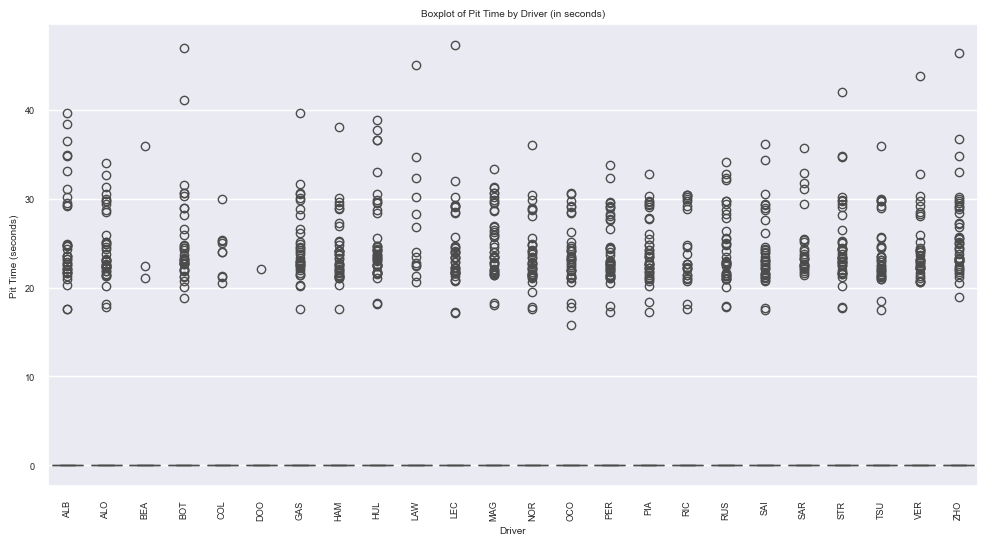

In [39]:
carreras_24_f = carreras_24[carreras_24['PitTime_seconds'] < 50]
carreras_24_f['PitTime_seconds'].describe()

# Boxplot por Driver
plt.figure(figsize=(12, 6))
sns.boxplot(x='Driver', y='PitTime_seconds', data=carreras_24_f)
plt.title('Boxplot of Pit Time by Driver (in seconds)')
plt.xlabel('Driver')
plt.ylabel('Pit Time (seconds)')
plt.xticks(rotation=90)
plt.show()

#### ¿Podemos asumir que son legítimos?

In [40]:
# outliers
df = carreras_24
df[df['PitTime_seconds'] >= 100][['EventName', 'Driver', 'LapNumber','PitInTime', 'PitOutTime2', 'PitTime_seconds', 'LapTime']]

,EventName,Driver,LapNumber,PitInTime,PitOutTime2,PitTime_seconds,LapTime
3031,Japanese Grand Prix,ALO,1,0 days 01:04:59.334000,0 days 01:31:20.261000,1580.927,140.526
3040,Japanese Grand Prix,BOT,1,0 days 01:05:22.020000,0 days 01:31:44.274000,1582.254,164.736
3042,Japanese Grand Prix,GAS,1,0 days 01:05:29.811000,0 days 01:31:56.442000,1586.631,173.223
3034,Japanese Grand Prix,HAM,1,0 days 01:05:11.331000,0 days 01:31:32.133000,1580.802,152.716
3045,Japanese Grand Prix,HUL,1,0 days 01:05:20.087000,0 days 01:31:40.905000,1580.818,162.853
3029,Japanese Grand Prix,LEC,1,0 days 01:05:12.799000,0 days 01:31:36.027000,1583.228,154.543
3039,Japanese Grand Prix,MAG,1,0 days 01:05:39.276000,0 days 01:32:03.600000,1584.324,185.172
3030,Japanese Grand Prix,NOR,1,0 days 01:04:53.865000,0 days 01:31:13.972000,1580.107,134.751
3041,Japanese Grand Prix,OCO,1,0 days 01:05:27.302000,0 days 01:31:53.245000,1585.943,170.167
3046,Japanese Grand Prix,PER,1,0 days 01:04:51.966000,0 days 01:31:09.531000,1577.565,132.767


#### Análisis de nulos de LapTime

 Teniendo en cuenta que LapTime es la suma de los tramos Sector1Time, Sector2Time y Sector3Time, hay registros sin datos en absoluto?

In [ ]:
# Miro los tiempos. Hay información?
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
print(f"Cantidad de filas con los 4 campos nulos: {todo_nulo.sum()}")
carreras_24[todo_nulo]

#### Entonces:

- Qué tipo de error es este?
- Vale la pena imputar todos estos datos? O es mejor descartar estas 29 filas?


In [ ]:
carreras_24.shape # antes

In [ ]:
# Decidimos descartarlos:
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
carreras_24 = carreras_24[~todo_nulo]
carreras_24.shape # despues

Si todavía hay nulos, analizamos en detalle: 
¿Es MCAR, MAR o MNAR? ¿Hay patrones?

Cosas que podríamos mirar:
1) ¿La vuelta fue eliminada y por eso falta el LapTime?
2) ¿El piloto hizo una parada en boxes y por eso falta el LapTime?
3) ¿El piloto abandonó por falla técnica, choque, etc.?
4) ¿Hubo algún incidente?

In [ ]:
missing_laptime = carreras_24[carreras_24['LapTime'].isna()]

missing_laptime[['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

In [ ]:
# ¿Cuántos coinciden con NaN en la columna Position?
print(f"Cuántos coinciden con NaN en Position?: {missing_laptime[missing_laptime['Position'].isnull()].shape[0]}")

# ¿Cuántos de esos datos faltantes son por safety car o virtual safety car?
print(f"Cuántos coinciden con un virtual safety car o safety car?: {missing_laptime[(missing_laptime['TrackStatus'] == 6) | (missing_laptime['TrackStatus'] == 4)].shape[0]}")

# ¿Cuántos de esos datos faltantes coinciden con bandera roja?
print(f"Cuántos coinciden con bandera roja?: {missing_laptime[ (missing_laptime['TrackStatus'] == 5)].shape[0]}")

# ¿Cuántos de esos datos faltantes ocurrieron con pista normal?
print(f"¿Cuántos nulos con pista normal? (TrackStatus = 1) : {missing_laptime[(missing_laptime['TrackStatus'] == 1)].shape[0]}")


In [ ]:
# Chequear si hay nulos por abandono (DNF)

# Encuentro la última vuelta válida de cada piloto en cada carrera
last_valid_lap = carreras_24[~carreras_24['LapTime'].isna()].groupby(['EventName', 'Driver'], observed=True)['LapNumber'].max()
# Nota: el ~ significa que invierto la condición, es decir, busco los que no son NaN

# Busco el número máximo de vueltas de cada carrera
max_laps_per_race = carreras_24.groupby('EventName', observed=True)['LapNumber'].max()

# Combinar para ver si el piloto terminó la carrera
dnf_info = last_valid_lap.reset_index().merge(
    max_laps_per_race.reset_index(), on='EventName', suffixes=('_driver', '_race')
)
dnf_info['DNF'] = dnf_info['LapNumber_driver'] < dnf_info['LapNumber_race']

dnf_info[dnf_info['DNF']==True]

In [ ]:
# Combinar los datos DNF en el dataset principal
carreras_24 = carreras_24.merge(dnf_info[['EventName', 'Driver', 'LapNumber_driver', 'DNF']], 
                                on=['EventName', 'Driver'], how='left')

# Filtrar
carreras_24['Likely_DNF'] = carreras_24['LapNumber'] > carreras_24['LapNumber_driver']

carreras_24[carreras_24['LapTime'].isna() & carreras_24['Likely_DNF']]

#### Imputación de LapTime

Imputo el valor de LapTime con la suma de los tramos Sector1Time, Sector2Time y Sector3Time.
Primer paso - revisar LapTime nulo pero Sectores 1, 2 y 3 no nulos.

In [ ]:
carreras_24[carreras_24['LapTime'].isnull() & carreras_24['Sector1Time'].notnull() & carreras_24['Sector2Time'].notnull() & carreras_24['Sector3Time'].notnull()].shape[0]


In [ ]:
# Imputar LapTime cuando los 3 tramos están disponibles

def imputar_laptime_con_sectores(row):
    if pd.isna(row['LapTime']) and pd.notna(row['Sector1Time']) and pd.notna(row['Sector2Time']) and pd.notna(row['Sector3Time']):
        return row['Sector1Time'] + row['Sector2Time'] + row['Sector3Time']
    return row['LapTime']

# Aplicar la imputación en la columna
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)


In [ ]:
print(f"Después de imputar, me quedaron {carreras_24['LapTime'].isnull().sum()} nulos")

In [ ]:
# Empiezo a explorar.
# Hay muchos de 'São Paulo Grand Prix', LapNumber 33. Miremos estos datos en el datast carreras_24

filtro=(carreras_24['EventName']=='São Paulo Grand Prix') & (carreras_24['LapNumber']==33)

carreras_24[filtro][['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

El Sector1Time es casi todo nulos en la vuelta 33.

Miro las estadísticas de tiempos en sector 1, 2 y 3 para ver si hay un patrón que se pueda usar para imputar los tiempos de los sectores individuales.

In [ ]:
# Filtrar el DataFrame por EventName
saopaulo_df = carreras_24[carreras_24['EventName'] == 'São Paulo Grand Prix']

# Convertir tiempos a segundos y eliminar NaNs
sector1_seconds = saopaulo_df['Sector1Time'].dropna()
sector2_seconds = saopaulo_df['Sector2Time'].dropna()
sector3_seconds = saopaulo_df['Sector3Time'].dropna()

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Sector 1
axs[0].hist(sector1_seconds, bins=50, color='mediumseagreen', edgecolor='black')
axs[0].set_title('Sector 1 – São Paulo Grand Prix')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

# Sector 2
axs[1].hist(sector2_seconds, bins=50, color='cornflowerblue', edgecolor='black')
axs[1].set_title('Sector 2 – São Paulo Grand Prix')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(True)

# Sector 3
axs[2].hist(sector3_seconds, bins=50, color='salmon', edgecolor='black')
axs[2].set_title('Sector 3 – São Paulo Grand Prix')
axs[2].set_xlabel('Tiempo en segundos')
axs[2].set_ylabel('Frecuencia')
axs[2].grid(True)

# Ajustar espacios
plt.tight_layout()
plt.show()


In [ ]:
sector1_seconds.describe()

In [ ]:
sector2_seconds.describe()

In [ ]:
sector3_seconds.describe()

In [ ]:

# En los sectores 1 y 3 los datos están bastante concentrados, y tiene sentido imputar la mediana de ese valor en la misma carrera.
# En el sector 2 solo hay 3 nulos. No es tan relevante ni va a tener un impacto importante imputar también estos 3 con la mediana.

# Imputar Sector1Time, Sector2Time y Sector3Time por la mediana del mismo EventName
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    carreras_24[sector] = carreras_24[sector].fillna(
        carreras_24.groupby('EventName',observed=True)[sector].transform('median')
    )


In [ ]:
# Vuelvo a aplicar la imputación en la columna LapTime para tratar los últimos faltantes.
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)

In [ ]:
carreras_24.info()

In [ ]:
carreras_24['Deleted'].unique()

In [ ]:
# Hay nulos porque la vuelta fue anulada? Deleted = 1

carreras_24[(carreras_24['Deleted']== True) & (carreras_24['LapTime'].isnull())]

#### Análisis de la variable Position

In [ ]:
carreras_24.isna().sum()

#### Creación de otras variables útiles

In [ ]:
# Ganador de cada carrera
winners = carreras_24[carreras_24['Position'] == 1][['EventName', 'Driver']].set_index('EventName')['Driver'].to_dict()
carreras_24['Winner'] = carreras_24['EventName'].map(winners)
carreras_24['Winner'] = carreras_24['Winner'].astype('category')

### Exportación para leer en otra Notebook

In [ ]:

import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in carreras_24.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in carreras_24.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("../datasets/carreras_24_dtypes.json", "w") as f:
    json.dump(info, f)

# exportar CSV
carreras_24.to_csv('../datasets/carreras_24.csv', index=False)


### ANÁLISIS CON ESTADÍSTICA INFERENCIAL

Problema: quiero determinar cómo la selección del tipo de cubierta, la estrategia (en qué vuelta entra a boxes) y el tiempo de parada afectan la posibilidad de que el piloto mejore su posición al final de la carrera.

Vamos a utilizar una parte de los datos (un resumen por cada piloto por carrera). Primero, definimos una nueva variable 'ImprovedPosition' de esta forma:

'ImprovedPosition'  = 1 si  'Final Position' < 'InitialPosition' 
'ImprovedPosition'  = 0 en caso contrario

Armamos un dataset con el resumen de la información por piloto y carrera.

In [ ]:
resumen = carreras_24.groupby(['Driver', 'EventName'], observed=True).agg(
    Position_start=('Position', 'first'),
    Position_end=('Position', 'last'),
    Total_LapTime=('LapTime', 'sum'),
    Tyre_Compound_start=('Compound', 'first'),
    Tyre_Compound_end=('Compound', 'last'),
    Total_PitTime=('PitTime_seconds', 'sum'), # Total de tiempo en boxes
    Pit_Stops=('PitInTime', lambda x: x.notna().sum()),
).reset_index()

resumen['Improved_Position'] = resumen.apply(
    lambda row: 1 if row['Position_start'] - row['Position_end'] > 0 else 0,
    axis=1
)

# Info de las entradas a boxes
pit_laps = (
    carreras_24[carreras_24['PitInTime'].notna()]
    .groupby(['Driver', 'EventName'], observed=True)['LapNumber']
    .apply(list)
    .reset_index()
    .rename(columns={'LapNumber': 'Pit_LapNumbers'})
)
resumen = resumen.merge(pit_laps, on=['Driver', 'EventName'], how='left')
resumen['Pit_LapNumbers'] = resumen['Pit_LapNumbers'].apply(lambda x: x if isinstance(x, list) else [])

# Parsear Pit_LapNumbers (me quedo con la vuelta de la primera parada)
if isinstance(resumen['Pit_LapNumbers'].iloc[0], list):
    resumen['First_PitLap'] = resumen['Pit_LapNumbers'].apply(lambda x: x[0] if x else 0)
else:
    resumen['First_PitLap'] = resumen['Pit_LapNumbers'].fillna(0)


resumen.head()

In [ ]:
# Verifico que no quedaron nulos
resumen.isnull().sum()

In [ ]:
resumen.columns

In [ ]:
resumen.head()

***Importante!***
Antes de hacer los tests, hay que verificar que se cumplen los supuestos:

* Normalidad para los test-t, ANOVA y correlación de Pearson.

* Chi-Cuadrado: Asegurarse que las frecuencias esperadas (tabla de contingencia) > 5. Si alguna no verifica, se pueden combinar categorías poco frecuentes.

* Spearman/Kendall: no asumen normalidad así que son robustos.


1) Relación entre 'ImprovedPosition' y 'TyreCompound' 

* H0: no hay relación entre 'ImprovedPosition' y 'TyreCompound'
* H1: hay relación entre 'ImprovedPosition' y 'TyreCompound'

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:

contingency = pd.crosstab(resumen['Tyre_Compound_start'], resumen['Improved_Position'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Resultado Test Chi-Cuadrado (Tyre_Compound_start vs Improved_Position): chi2={chi2:.2f}, p={p:.4f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre Tyre_Compound_start y Improved_Position.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre Tyre_Compound_start y Improved_Position.")

2) Test-t independiente (Total_PitTime vs. Improved_Position)

* H0: no hay diferencia en la media de Total_PitTime para Improved_Position = 1 y 0.
* H1: hay diferencia entre la media de Total_PitTime para los que mejoraron y los que no mejoraron su posición.


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Filtro Total_PitTime para los pilotos que mejoraron su posición
improved = resumen[resumen['Improved_Position'] == 1]['Total_PitTime'] 

# Filtro Total_PitTime para los pilotos que NO mejoraron su posición
not_improved = resumen[resumen['Improved_Position'] == 0]['Total_PitTime']

# Realizo el t-Test
t_stat, p = ttest_ind(improved, not_improved, equal_var=False) 
print(f"Resultado del t-Test (Total_PitTime vs Improved_Position): t={t_stat:.2f}, p={p:.4f}")

if p <= 0.05:
    print("Rechazamos H0: concluimos que el tiempo en boxes tiene un impacto en la posición final.")
else:
    print("No rechazamos H0: no hay evidencia de que haya diferencias (el tiempo en boxes no afecta la posición).")

3. Test-t independiente (First_PitLap vs. Improved_Position)

* H0: no hay diferencia en la media de la primera salida a boxes para los que mejoraron su posición final y para los que no (el timing de la primera parada no tiene que ver con la posición final del piloto).
* H1: hay diferencia en la media de la primera salida a boxes para los que mejoraron su posición final y para los que no (el timing de la primera parada afecta la posición final del piloto).


In [ ]:
improved_pitlap = resumen[resumen['Improved_Position'] == 1]['First_PitLap']
not_improved_pitlap = resumen[resumen['Improved_Position'] == 0]['First_PitLap']
t_stat, p = ttest_ind(improved_pitlap, not_improved_pitlap, equal_var=False)
print(f"t-Test (First_PitLap vs Improved_Position): t={t_stat:.2f}, p={p:.4f}")

if p <= 0.05:
    print("Rechazamos H0: concluimos que la vuelta en la que se hace la primera parada impacta en la posición final.")
else:
    print("No rechazamos H0: no hay evidencia de que haya una relación entre la vuelta en la que se realiza la primera parada y la posición final.")

4. Test de correlación de Spearman  (Total_PitTime vs. Improved_Position)

* H0: no hay correlación entre Total_PitTime y Improved_Position
* H1: hay una correlacion entre Total_PitTime y Improved_Position.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
corr, p = spearmanr(resumen['Total_PitTime'], resumen['Improved_Position'])
print(f"Spearman (Total_PitTime vs Improved_Position): rho={corr:.2f}, p={p:.4f}")

if p <= 0.05:
    print("Rechazamos H0: concluimos que hay una relación monótona entre el tiempo total en boxes y la mejora en la posición.")
else:
    print("No rechazamos H0: no hay evidencia de que haya una relación monótona entre el tiempo total en boxes y la mejora en la posición")

4. Test de correlación de Spearman (First_PitLap vs. Improved_Position)

* H0: no hay correlación entre First_PitLap y Improved_Position.
* H1: hay una correlacion entre Improved_Position y Improved_Position.

In [ ]:
corr, p = spearmanr(resumen['First_PitLap'], resumen['Improved_Position'])
print(f"Resultados test de Spearman (First_PitLap vs Improved_Position): rho={corr:.2f}, p={p:.4f}")

if p <= 0.05:
    print("Rechazamos H0: concluimos que hay una relación monótona la primera salida boxes y la mejora en la posición.")
else:
    print("No rechazamos H0: no hay evidencia de que haya una relación monótona entre la primera salida a boxes y la mejora en la posición")

Nota: rho bajo (correlación débil) y da positivo, lo que sugiere que parar lo más tarde posible parecen incrementarse las chances de mejorar la posición final.

5. ANOVA (Total_PitTime para los distintos Tyre_Compound_start)

* H0: no hay diferencia en la media de Total_PitTime para los distintos Tyre_Compound_start.
* H1: hay diferencia en la media de Total_PitTime para los distintos Tyre_Compound_start.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
groups = [resumen[resumen['Tyre_Compound_start'] == c]['Total_PitTime'] 
          for c in resumen['Tyre_Compound_start'].unique()]
f_stat, p = f_oneway(*groups)
print(f"ANOVA (Total_PitTime vs Tyre_Compound_start): F={f_stat:.2f}, p={p:.4f}")

if p <= 0.05:
    print("Rechazamos H0: concluimos que hay una diferencia entre la media del tiempo total en boxes para distintas elecciones de cubiertas.")
else:
    print("No rechazamos H0: no hay evidencia de que haya una diferencia entre la media del tiempo total en boxes para distintas elecciones de cubiertas.")

Nota: esto se intepreta como que el tiempo total de parada varía en función de la cubierta que se elija al inicio.